In [55]:
# importing necessary packages
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import keras
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold

In [56]:
# get data 
forest = pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [57]:
# checking for null values
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [60]:
 forest.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [61]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

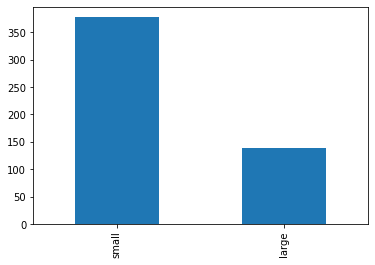

In [25]:
forest['size_category'].value_counts().plot(kind = 'bar')
# most of them are classified as small

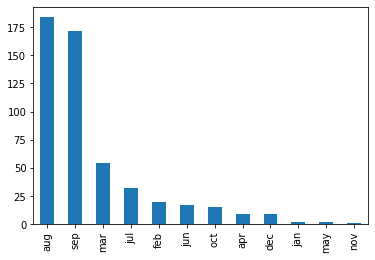

In [26]:
forest['month'].value_counts().plot(kind = 'bar')
# most of them occur in the month of august

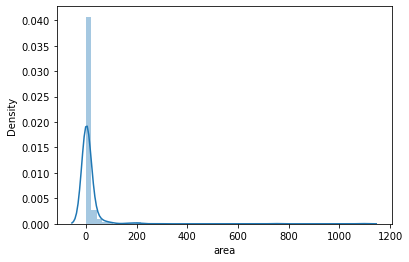

In [29]:
# density plot
sns.distplot(forest['area'])
# most forestfire spread occured in the land of ares 100-200 hectors 

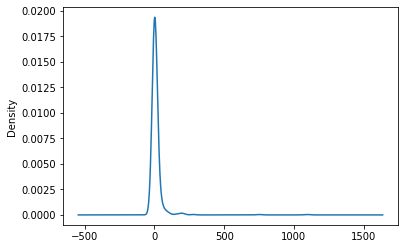

In [32]:
(forest['area']).plot(kind ='kde')
plt.show()

In [3]:
x = forest.iloc[:,2:30]
y = forest['size_category']

In [4]:
# Standardization
std_x=pd.DataFrame( StandardScaler().fit_transform(x))
std_x

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [5]:
std_x.describe().T 

,count,mean,std,min,25%,50%,75%,max
0,517.0,-1.752306e-15,1.000969,-13.045818,-0.080635,0.173229,0.408960,1.007353
1,517.0,-2.748715e-17,1.000969,-1.715608,-0.660665,-0.040203,0.492739,2.819865
2,517.0,6.871787e-17,1.000969,-2.179108,-0.444828,0.469119,0.669663,1.261610
3,517.0,1.030768e-17,1.000969,-1.980578,-0.553595,-0.136477,0.390409,10.335381
4,517.0,2.542561e-16,1.000969,-2.876943,-0.584238,0.070821,0.674164,2.484195
5,517.0,2.198972e-16,1.000969,-1.796637,-0.692456,-0.140366,0.534411,3.417549
6,517.0,-4.191790e-16,1.000969,-2.021098,-0.736124,-0.009834,0.492982,3.007063
7,517.0,-6.871787e-18,1.000969,-0.073268,-0.073268,-0.073268,-0.073268,21.572284
8,517.0,4.123072e-17,1.000969,-0.202020,-0.202020,-0.193843,-0.098709,16.951110
9,517.0,3.435893e-18,1.000969,-0.443576,-0.443576,-0.443576,-0.443576,2.254407


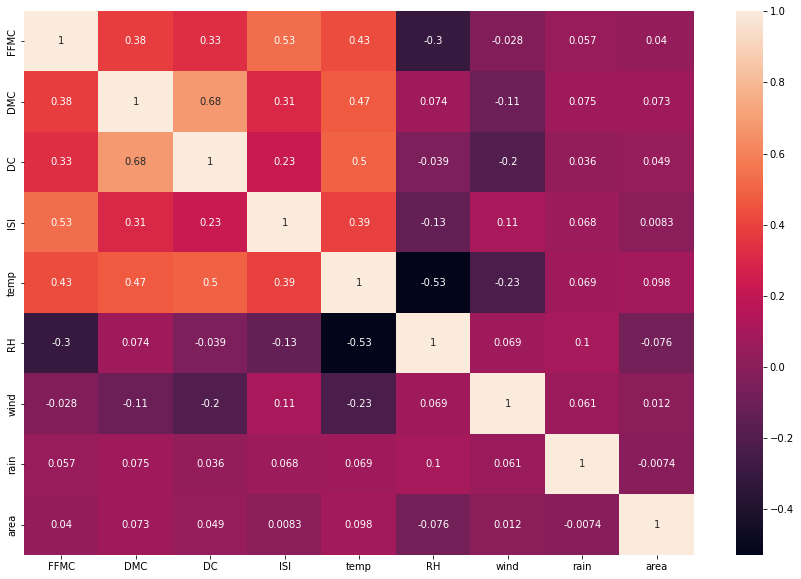

In [39]:
#heatmap of confusion _matrix
confusion_matrix = forest.iloc[:,:11].corr()
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix,annot =True)

### Tuning of Hyperparameters batch size and epochs

In [6]:
# importing necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [7]:
# create model
def base_model():
    model = Sequential()
    model.add(Dense(28, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(14, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [9]:
# Create the model
model = KerasClassifier(build_fn = base_model,verbose = 0)
# Define the grid search parameters
batch_size = [5,10,15,20]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
kfold = KFold(n_splits =10)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = kfold,verbose = 10)
grid_result = grid.fit(std_x,y) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 1/12] END ....batch_size=5, epochs=10;, score=0.962 total time=   3.8s
[CV 2/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 1/12] END ....batch_size=5, epochs=10;, score=1.000 total time=   3.3s
[CV 3/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 1/12] END ....batch_size=5, epochs=10;, score=1.000 total time=   3.6s
[CV 4/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 1/12] END ....batch_size=5, epochs=10;, score=0.769 total time=   3.3s
[CV 5/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 1/12] END ....batch_size=5, epochs=10;, score=0.962 total time=   3.3s
[CV 6/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 1/12] END ....batch_size=5, epochs=10;, score=0.788 total time=   3.3s
[CV 7/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 1/12] END ....batch_size=5, epochs=10;, score=0.923 total time=   3.3s
[CV 8/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 1/12] END ....batch_size=5, epochs=10;, score=0.902 total time=   2.4s
[CV 9/10; 1/12] START batch_size=5, epochs=10...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 1/12] END ....batch_size=5, epochs=10;, score=0.902 total time=   3.0s
[CV 10/10; 1/12] START batch_size=5, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 1/12] END ...batch_size=5, epochs=10;, score=0.902 total time=   3.6s
[CV 1/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 2/12] END ....batch_size=5, epochs=50;, score=1.000 total time=   9.5s
[CV 2/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 2/12] END ....batch_size=5, epochs=50;, score=1.000 total time=  11.0s
[CV 3/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 2/12] END ....batch_size=5, epochs=50;, score=1.000 total time=   7.6s
[CV 4/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 2/12] END ....batch_size=5, epochs=50;, score=0.769 total time=  11.0s
[CV 5/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 2/12] END ....batch_size=5, epochs=50;, score=0.981 total time=   7.8s
[CV 6/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 2/12] END ....batch_size=5, epochs=50;, score=0.846 total time=   9.0s
[CV 7/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 2/12] END ....batch_size=5, epochs=50;, score=0.904 total time=  11.0s
[CV 8/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 2/12] END ....batch_size=5, epochs=50;, score=0.882 total time=   8.2s
[CV 9/10; 2/12] START batch_size=5, epochs=50...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 2/12] END ....batch_size=5, epochs=50;, score=0.922 total time=  11.1s
[CV 10/10; 2/12] START batch_size=5, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 2/12] END ...batch_size=5, epochs=50;, score=0.882 total time=  11.1s
[CV 1/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 3/12] END ...batch_size=5, epochs=100;, score=1.000 total time=  21.3s
[CV 2/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 3/12] END ...batch_size=5, epochs=100;, score=0.981 total time=  14.7s
[CV 3/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 3/12] END ...batch_size=5, epochs=100;, score=1.000 total time=  14.8s
[CV 4/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 3/12] END ...batch_size=5, epochs=100;, score=0.769 total time=  21.3s
[CV 5/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 3/12] END ...batch_size=5, epochs=100;, score=0.981 total time=  21.2s
[CV 6/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 3/12] END ...batch_size=5, epochs=100;, score=0.788 total time=  21.2s
[CV 7/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 3/12] END ...batch_size=5, epochs=100;, score=0.904 total time=  21.2s
[CV 8/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 3/12] END ...batch_size=5, epochs=100;, score=0.941 total time=  21.4s
[CV 9/10; 3/12] START batch_size=5, epochs=100..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 3/12] END ...batch_size=5, epochs=100;, score=0.863 total time=  21.8s
[CV 10/10; 3/12] START batch_size=5, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 3/12] END ..batch_size=5, epochs=100;, score=0.882 total time=  16.4s
[CV 1/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 4/12] END ...batch_size=10, epochs=10;, score=1.000 total time=   2.2s
[CV 2/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 4/12] END ...batch_size=10, epochs=10;, score=1.000 total time=   1.7s
[CV 3/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 4/12] END ...batch_size=10, epochs=10;, score=0.981 total time=   2.0s
[CV 4/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 4/12] END ...batch_size=10, epochs=10;, score=0.673 total time=   1.6s
[CV 5/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 4/12] END ...batch_size=10, epochs=10;, score=0.962 total time=   2.1s
[CV 6/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 4/12] END ...batch_size=10, epochs=10;, score=0.788 total time=   1.6s
[CV 7/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 4/12] END ...batch_size=10, epochs=10;, score=0.942 total time=   2.1s
[CV 8/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 4/12] END ...batch_size=10, epochs=10;, score=0.882 total time=   2.1s
[CV 9/10; 4/12] START batch_size=10, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 4/12] END ...batch_size=10, epochs=10;, score=0.882 total time=   2.1s
[CV 10/10; 4/12] START batch_size=10, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 4/12] END ..batch_size=10, epochs=10;, score=0.863 total time=   1.6s
[CV 1/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 5/12] END ...batch_size=10, epochs=50;, score=1.000 total time=   5.0s
[CV 2/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 5/12] END ...batch_size=10, epochs=50;, score=1.000 total time=   4.8s
[CV 3/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 5/12] END ...batch_size=10, epochs=50;, score=1.000 total time=   5.9s
[CV 4/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 5/12] END ...batch_size=10, epochs=50;, score=0.673 total time=   5.2s
[CV 5/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 5/12] END ...batch_size=10, epochs=50;, score=1.000 total time=   4.7s
[CV 6/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 5/12] END ...batch_size=10, epochs=50;, score=0.750 total time=   4.9s
[CV 7/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 5/12] END ...batch_size=10, epochs=50;, score=0.942 total time=   4.6s
[CV 8/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 5/12] END ...batch_size=10, epochs=50;, score=0.922 total time=   5.0s
[CV 9/10; 5/12] START batch_size=10, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 5/12] END ...batch_size=10, epochs=50;, score=0.863 total time=   4.7s
[CV 10/10; 5/12] START batch_size=10, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 5/12] END ..batch_size=10, epochs=50;, score=0.902 total time=   6.0s
[CV 1/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 6/12] END ..batch_size=10, epochs=100;, score=1.000 total time=  11.1s
[CV 2/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 6/12] END ..batch_size=10, epochs=100;, score=1.000 total time=  11.1s
[CV 3/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 6/12] END ..batch_size=10, epochs=100;, score=1.000 total time=  11.7s
[CV 4/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 6/12] END ..batch_size=10, epochs=100;, score=0.731 total time=   8.5s
[CV 5/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 6/12] END ..batch_size=10, epochs=100;, score=0.981 total time=   8.9s
[CV 6/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 6/12] END ..batch_size=10, epochs=100;, score=0.769 total time=  11.0s
[CV 7/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 6/12] END ..batch_size=10, epochs=100;, score=0.904 total time=   8.6s
[CV 8/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 6/12] END ..batch_size=10, epochs=100;, score=0.922 total time=  21.3s
[CV 9/10; 6/12] START batch_size=10, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 6/12] END ..batch_size=10, epochs=100;, score=0.902 total time=  21.3s
[CV 10/10; 6/12] START batch_size=10, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 6/12] END .batch_size=10, epochs=100;, score=0.863 total time=   9.0s
[CV 1/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 7/12] END ...batch_size=15, epochs=10;, score=1.000 total time=   1.7s
[CV 2/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 7/12] END ...batch_size=15, epochs=10;, score=0.981 total time=   1.8s
[CV 3/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 7/12] END ...batch_size=15, epochs=10;, score=1.000 total time=   1.4s
[CV 4/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 7/12] END ...batch_size=15, epochs=10;, score=0.635 total time=   1.4s
[CV 5/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 7/12] END ...batch_size=15, epochs=10;, score=0.981 total time=   2.0s
[CV 6/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 7/12] END ...batch_size=15, epochs=10;, score=0.731 total time=   1.4s
[CV 7/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 7/12] END ...batch_size=15, epochs=10;, score=0.923 total time=   1.2s
[CV 8/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 7/12] END ...batch_size=15, epochs=10;, score=0.882 total time=   1.5s
[CV 9/10; 7/12] START batch_size=15, epochs=10..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 7/12] END ...batch_size=15, epochs=10;, score=0.882 total time=   1.5s
[CV 10/10; 7/12] START batch_size=15, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 7/12] END ..batch_size=15, epochs=10;, score=0.863 total time=   1.4s
[CV 1/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 8/12] END ...batch_size=15, epochs=50;, score=1.000 total time=   3.2s
[CV 2/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 8/12] END ...batch_size=15, epochs=50;, score=1.000 total time=   5.9s
[CV 3/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 8/12] END ...batch_size=15, epochs=50;, score=1.000 total time=   3.3s
[CV 4/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 8/12] END ...batch_size=15, epochs=50;, score=0.712 total time=   3.7s
[CV 5/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 8/12] END ...batch_size=15, epochs=50;, score=0.981 total time=   3.3s
[CV 6/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 8/12] END ...batch_size=15, epochs=50;, score=0.769 total time=   5.9s
[CV 7/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 8/12] END ...batch_size=15, epochs=50;, score=0.923 total time=   4.6s
[CV 8/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 8/12] END ...batch_size=15, epochs=50;, score=0.882 total time=   6.5s
[CV 9/10; 8/12] START batch_size=15, epochs=50..................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 8/12] END ...batch_size=15, epochs=50;, score=0.941 total time=   5.4s
[CV 10/10; 8/12] START batch_size=15, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 8/12] END ..batch_size=15, epochs=50;, score=0.922 total time=   5.2s
[CV 1/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 9/12] END ..batch_size=15, epochs=100;, score=1.000 total time=  11.0s
[CV 2/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 9/12] END ..batch_size=15, epochs=100;, score=1.000 total time=   6.2s
[CV 3/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 9/12] END ..batch_size=15, epochs=100;, score=1.000 total time=  11.0s
[CV 4/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 9/12] END ..batch_size=15, epochs=100;, score=0.712 total time=   5.8s
[CV 5/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 9/12] END ..batch_size=15, epochs=100;, score=0.981 total time=   6.0s
[CV 6/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 9/12] END ..batch_size=15, epochs=100;, score=0.808 total time=  11.0s
[CV 7/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 9/12] END ..batch_size=15, epochs=100;, score=0.904 total time=   5.7s
[CV 8/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 9/12] END ..batch_size=15, epochs=100;, score=0.902 total time=   6.3s
[CV 9/10; 9/12] START batch_size=15, epochs=100.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 9/12] END ..batch_size=15, epochs=100;, score=0.902 total time=  11.1s
[CV 10/10; 9/12] START batch_size=15, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 9/12] END .batch_size=15, epochs=100;, score=0.882 total time=  11.0s
[CV 1/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 10/12] END ..batch_size=20, epochs=10;, score=1.000 total time=   2.1s
[CV 2/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 10/12] END ..batch_size=20, epochs=10;, score=1.000 total time=   2.3s
[CV 3/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 10/12] END ..batch_size=20, epochs=10;, score=1.000 total time=   2.3s
[CV 4/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 10/12] END ..batch_size=20, epochs=10;, score=0.654 total time=   1.4s
[CV 5/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 10/12] END ..batch_size=20, epochs=10;, score=0.981 total time=   1.4s
[CV 6/10; 10/12] START batch_size=20, epochs=10.................................
[CV 6/10; 10/12] END ..batch_size=20, epochs=10;, score=0.769 total time=   1.5s
[CV 7/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 10/12] END ..batch_size=20, epochs=10;, score=0.904 total time=   1.5s
[CV 8/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 10/12] END ..batch_size=20, epochs=10;, score=0.882 total time=   1.5s
[CV 9/10; 10/12] START batch_size=20, epochs=10.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 10/12] END ..batch_size=20, epochs=10;, score=0.961 total time=   1.3s
[CV 10/10; 10/12] START batch_size=20, epochs=10................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 10/12] END .batch_size=20, epochs=10;, score=0.863 total time=   1.5s
[CV 1/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 11/12] END ..batch_size=20, epochs=50;, score=1.000 total time=   3.4s
[CV 2/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 11/12] END ..batch_size=20, epochs=50;, score=1.000 total time=   2.8s
[CV 3/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 11/12] END ..batch_size=20, epochs=50;, score=1.000 total time=   3.9s
[CV 4/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 11/12] END ..batch_size=20, epochs=50;, score=0.750 total time=   6.0s
[CV 5/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 11/12] END ..batch_size=20, epochs=50;, score=0.981 total time=   2.8s
[CV 6/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 11/12] END ..batch_size=20, epochs=50;, score=0.808 total time=   3.4s
[CV 7/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 11/12] END ..batch_size=20, epochs=50;, score=0.923 total time=   3.2s
[CV 8/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 11/12] END ..batch_size=20, epochs=50;, score=0.922 total time=   3.5s
[CV 9/10; 11/12] START batch_size=20, epochs=50.................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 11/12] END ..batch_size=20, epochs=50;, score=0.941 total time=   3.4s
[CV 10/10; 11/12] START batch_size=20, epochs=50................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 11/12] END .batch_size=20, epochs=50;, score=0.882 total time=   3.1s
[CV 1/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 12/12] END .batch_size=20, epochs=100;, score=1.000 total time=   6.1s
[CV 2/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 12/12] END .batch_size=20, epochs=100;, score=1.000 total time=   6.0s
[CV 3/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 12/12] END .batch_size=20, epochs=100;, score=1.000 total time=   6.0s
[CV 4/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 12/12] END .batch_size=20, epochs=100;, score=0.769 total time=   5.0s
[CV 5/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 12/12] END .batch_size=20, epochs=100;, score=0.981 total time=   6.7s
[CV 6/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 12/12] END .batch_size=20, epochs=100;, score=0.788 total time=   5.9s
[CV 7/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 12/12] END .batch_size=20, epochs=100;, score=0.923 total time=   6.0s
[CV 8/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 12/12] END .batch_size=20, epochs=100;, score=0.902 total time=   4.8s
[CV 9/10; 12/12] START batch_size=20, epochs=100................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 12/12] END .batch_size=20, epochs=100;, score=0.922 total time=   6.0s
[CV 10/10; 12/12] START batch_size=20, epochs=100...............................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 12/12] END batch_size=20, epochs=100;, score=0.843 total time=   4.9s


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9206636488437653, using {'batch_size': 20, 'epochs': 50}
0.9109728515148163,0.07513681660162272 with: {'batch_size': 5, 'epochs': 10}
0.9186274528503418,0.07359122055729345 with: {'batch_size': 5, 'epochs': 50}
0.9109351456165313,0.08050006802335156 with: {'batch_size': 5, 'epochs': 100}
0.89736048579216,0.09898312195431368 with: {'batch_size': 10, 'epochs': 10}
0.9051659166812897,0.10833934367919446 with: {'batch_size': 10, 'epochs': 50}
0.9070889890193939,0.091450831227306 with: {'batch_size': 10, 'epochs': 100}
0.8877450942993164,0.11539362132873475 with: {'batch_size': 15, 'epochs': 10}
0.9129713416099549,0.09511263338325227 with: {'batch_size': 15, 'epochs': 50}
0.9090120613574981,0.08948959150312001 with: {'batch_size': 15, 'epochs': 100}
0.9013574659824372,0.10936471978830728 with: {'batch_size': 20, 'epochs': 10}
0.9206636488437653,0.08141203041644725 with: {'batch_size': 20, 'epochs': 50}
0.9128205180168152,0.08285914908802684 with: {'batch_size': 20, 'epochs': 100}


### Tuning of hyperparameters:Learning rate

In [13]:
# Defining the model

def create_model(learning_rate):
    model = Sequential()
    model.add(Dense(28,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(14,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = kfold,verbose = 10)
grid_result = grid.fit(std_x,y)
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10; 1/3] START learning_rate=0.001........................................
[CV 1/10; 1/3] END .........learning_rate=0.001;, score=1.000 total time=   3.4s
[CV 2/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 1/3] END .........learning_rate=0.001;, score=1.000 total time=   3.4s
[CV 3/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 1/3] END .........learning_rate=0.001;, score=0.981 total time=   3.3s
[CV 4/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 1/3] END .........learning_rate=0.001;, score=0.615 total time=   2.7s
[CV 5/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 1/3] END .........learning_rate=0.001;, score=0.981 total time=   2.7s
[CV 6/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 1/3] END .........learning_rate=0.001;, score=0.846 total time=   3.8s
[CV 7/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 1/3] END .........learning_rate=0.001;, score=0.885 total time=   2.8s
[CV 8/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 1/3] END .........learning_rate=0.001;, score=0.922 total time=   3.4s
[CV 9/10; 1/3] START learning_rate=0.001........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 1/3] END .........learning_rate=0.001;, score=0.941 total time=   2.8s
[CV 10/10; 1/3] START learning_rate=0.001.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 1/3] END ........learning_rate=0.001;, score=0.863 total time=   2.9s
[CV 1/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 2/3] END ..........learning_rate=0.01;, score=1.000 total time=   2.8s
[CV 2/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 2/3] END ..........learning_rate=0.01;, score=0.981 total time=   3.4s
[CV 3/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 2/3] END ..........learning_rate=0.01;, score=1.000 total time=   3.4s
[CV 4/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 2/3] END ..........learning_rate=0.01;, score=0.712 total time=   3.4s
[CV 5/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 2/3] END ..........learning_rate=0.01;, score=0.981 total time=   2.9s
[CV 6/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 2/3] END ..........learning_rate=0.01;, score=0.712 total time=   2.9s
[CV 7/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 2/3] END ..........learning_rate=0.01;, score=0.923 total time=   3.4s
[CV 8/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 2/3] END ..........learning_rate=0.01;, score=0.922 total time=   3.0s
[CV 9/10; 2/3] START learning_rate=0.01.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 2/3] END ..........learning_rate=0.01;, score=0.902 total time=   4.0s
[CV 10/10; 2/3] START learning_rate=0.01........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 2/3] END .........learning_rate=0.01;, score=0.902 total time=   2.8s
[CV 1/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/10; 3/3] END ...........learning_rate=0.1;, score=1.000 total time=   3.3s
[CV 2/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/10; 3/3] END ...........learning_rate=0.1;, score=0.885 total time=   3.4s
[CV 3/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/10; 3/3] END ...........learning_rate=0.1;, score=1.000 total time=   3.4s
[CV 4/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/10; 3/3] END ...........learning_rate=0.1;, score=0.500 total time=   3.3s
[CV 5/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/10; 3/3] END ...........learning_rate=0.1;, score=0.346 total time=   2.9s
[CV 6/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 6/10; 3/3] END ...........learning_rate=0.1;, score=0.712 total time=   6.2s
[CV 7/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 7/10; 3/3] END ...........learning_rate=0.1;, score=0.788 total time=   3.3s
[CV 8/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 8/10; 3/3] END ...........learning_rate=0.1;, score=0.647 total time=   3.5s
[CV 9/10; 3/3] START learning_rate=0.1..........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 9/10; 3/3] END ...........learning_rate=0.1;, score=0.824 total time=   5.9s
[CV 10/10; 3/3] START learning_rate=0.1.........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 10/10; 3/3] END ..........learning_rate=0.1;, score=0.784 total time=   2.7s


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9033182501792908, using {'learning_rate': 0.001}
0.9033182501792908,0.10983071451806403 with: {'learning_rate': 0.001}
0.9033182442188263,0.10245886441015874 with: {'learning_rate': 0.01}
0.7485671222209931,0.19718822149462925 with: {'learning_rate': 0.1}


### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [16]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(28,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dense(14,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(std_x,y)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.971 total time=   3.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.808 total time=   2.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.893 total time=   3.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.835 total time=   3.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.825 total time=   2.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   2.7s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.837 total time=   2.9s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.932 total time=   2.8s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.845 total time=   2.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.883 total time=   2.5s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   3.4s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   3.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   3.4s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   3.1s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   3.3s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.4s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.885 total time=   2.5s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.883 total time=   3.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.913 total time=   2.6s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.874 total time=   2.7s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   3.4s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.846 total time=   2.5s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.903 total time=   2.5s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.893 total time=   3.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.874 total time=   2.6s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   3.7s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   3.4s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   2.5s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   3.5s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   3.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   3.4s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.885 total time=   2.7s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.893 total time=   3.4s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.951 total time=   2.8s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.922 total time=   3.3s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.8s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.875 total time=   3.8s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.922 total time=   3.4s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.913 total time=   2.6s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.922 total time=   3.4s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   3.4s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   3.4s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   3.5s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   3.4s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   3.3s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   3.3s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.962 total time=   3.4s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.903 total time=   3.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.951 total time=   3.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.932 total time=   3.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   3.4s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.952 total time=   3.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.913 total time=   3.4s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.961 total time=   3.3s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.961 total time=   3.4s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   2.7s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   3.3s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   2.7s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   3.4s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   3.4s


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.957374918460846, using {'activation_function': 'linear', 'init': 'normal'}
0.8664488315582275,0.05970148126948494 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8993465304374695,0.060640949402951075 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9109036564826966,0.04639202742634024 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9032113432884217,0.052133804686055565 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9303211212158203,0.04202952994859581 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9264563083648681,0.04069860690513502 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9495892405509949,0.03216904561402911 with: {'activa

### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [18]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

# Define the grid search parameters

neuron1 = [14,28,35]
neuron2 = [10,14,28]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(std_x,y) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=14, neuron2=10......................................
[CV 1/5; 1/9] END .......neuron1=14, neuron2=10;, score=0.990 total time=   2.7s
[CV 2/5; 1/9] START neuron1=14, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .......neuron1=14, neuron2=10;, score=0.894 total time=   4.1s
[CV 3/5; 1/9] START neuron1=14, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .......neuron1=14, neuron2=10;, score=0.903 total time=   2.9s
[CV 4/5; 1/9] START neuron1=14, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .......neuron1=14, neuron2=10;, score=0.932 total time=   2.7s
[CV 5/5; 1/9] START neuron1=14, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .......neuron1=14, neuron2=10;, score=0.951 total time=   3.4s
[CV 1/5; 2/9] START neuron1=14, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .......neuron1=14, neuron2=14;, score=1.000 total time=   2.6s
[CV 2/5; 2/9] START neuron1=14, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .......neuron1=14, neuron2=14;, score=0.942 total time=   2.6s
[CV 3/5; 2/9] START neuron1=14, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .......neuron1=14, neuron2=14;, score=0.922 total time=   3.4s
[CV 4/5; 2/9] START neuron1=14, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .......neuron1=14, neuron2=14;, score=0.971 total time=   3.4s
[CV 5/5; 2/9] START neuron1=14, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .......neuron1=14, neuron2=14;, score=0.922 total time=   3.3s
[CV 1/5; 3/9] START neuron1=14, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .......neuron1=14, neuron2=28;, score=1.000 total time=   2.4s
[CV 2/5; 3/9] START neuron1=14, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .......neuron1=14, neuron2=28;, score=0.933 total time=   3.4s
[CV 3/5; 3/9] START neuron1=14, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .......neuron1=14, neuron2=28;, score=0.913 total time=   3.4s
[CV 4/5; 3/9] START neuron1=14, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .......neuron1=14, neuron2=28;, score=0.932 total time=   3.4s
[CV 5/5; 3/9] START neuron1=14, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .......neuron1=14, neuron2=28;, score=0.961 total time=   3.8s
[CV 1/5; 4/9] START neuron1=28, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .......neuron1=28, neuron2=10;, score=1.000 total time=   3.4s
[CV 2/5; 4/9] START neuron1=28, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .......neuron1=28, neuron2=10;, score=0.913 total time=   2.4s
[CV 3/5; 4/9] START neuron1=28, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .......neuron1=28, neuron2=10;, score=0.903 total time=   3.3s
[CV 4/5; 4/9] START neuron1=28, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .......neuron1=28, neuron2=10;, score=0.951 total time=   3.3s
[CV 5/5; 4/9] START neuron1=28, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .......neuron1=28, neuron2=10;, score=0.951 total time=   3.4s
[CV 1/5; 5/9] START neuron1=28, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .......neuron1=28, neuron2=14;, score=1.000 total time=   3.3s
[CV 2/5; 5/9] START neuron1=28, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .......neuron1=28, neuron2=14;, score=0.952 total time=   2.7s
[CV 3/5; 5/9] START neuron1=28, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .......neuron1=28, neuron2=14;, score=0.903 total time=   3.4s
[CV 4/5; 5/9] START neuron1=28, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .......neuron1=28, neuron2=14;, score=0.951 total time=   3.3s
[CV 5/5; 5/9] START neuron1=28, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .......neuron1=28, neuron2=14;, score=0.951 total time=   3.4s
[CV 1/5; 6/9] START neuron1=28, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .......neuron1=28, neuron2=28;, score=1.000 total time=   2.6s
[CV 2/5; 6/9] START neuron1=28, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .......neuron1=28, neuron2=28;, score=0.971 total time=   3.4s
[CV 3/5; 6/9] START neuron1=28, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .......neuron1=28, neuron2=28;, score=0.922 total time=   2.5s
[CV 4/5; 6/9] START neuron1=28, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .......neuron1=28, neuron2=28;, score=0.951 total time=   3.8s
[CV 5/5; 6/9] START neuron1=28, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .......neuron1=28, neuron2=28;, score=0.932 total time=   3.4s
[CV 1/5; 7/9] START neuron1=35, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .......neuron1=35, neuron2=10;, score=1.000 total time=   3.4s
[CV 2/5; 7/9] START neuron1=35, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .......neuron1=35, neuron2=10;, score=0.942 total time=   3.5s
[CV 3/5; 7/9] START neuron1=35, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .......neuron1=35, neuron2=10;, score=0.922 total time=   2.6s
[CV 4/5; 7/9] START neuron1=35, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .......neuron1=35, neuron2=10;, score=0.922 total time=   3.3s
[CV 5/5; 7/9] START neuron1=35, neuron2=10......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .......neuron1=35, neuron2=10;, score=0.951 total time=   5.9s
[CV 1/5; 8/9] START neuron1=35, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .......neuron1=35, neuron2=14;, score=1.000 total time=   2.6s
[CV 2/5; 8/9] START neuron1=35, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .......neuron1=35, neuron2=14;, score=0.923 total time=   3.4s
[CV 3/5; 8/9] START neuron1=35, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .......neuron1=35, neuron2=14;, score=0.913 total time=   3.4s
[CV 4/5; 8/9] START neuron1=35, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .......neuron1=35, neuron2=14;, score=0.942 total time=   3.4s
[CV 5/5; 8/9] START neuron1=35, neuron2=14......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .......neuron1=35, neuron2=14;, score=0.922 total time=   2.7s
[CV 1/5; 9/9] START neuron1=35, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .......neuron1=35, neuron2=28;, score=0.990 total time=   3.5s
[CV 2/5; 9/9] START neuron1=35, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .......neuron1=35, neuron2=28;, score=0.952 total time=   3.9s
[CV 3/5; 9/9] START neuron1=35, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .......neuron1=35, neuron2=28;, score=0.903 total time=   3.3s
[CV 4/5; 9/9] START neuron1=35, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .......neuron1=35, neuron2=28;, score=0.951 total time=   3.4s
[CV 5/5; 9/9] START neuron1=35, neuron2=28......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .......neuron1=35, neuron2=28;, score=0.971 total time=   2.6s


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9553958177566528, using {'neuron1': 28, 'neuron2': 28}
0.934204638004303,0.034743640886587004 with: {'neuron1': 14, 'neuron2': 10}
0.951568329334259,0.030046085329134605 with: {'neuron1': 14, 'neuron2': 14}
0.9477035164833069,0.030389507790345417 with: {'neuron1': 14, 'neuron2': 28}
0.9438573598861695,0.03425743818434733 with: {'neuron1': 28, 'neuron2': 10}
0.9515496611595153,0.030702294018587293 with: {'neuron1': 28, 'neuron2': 14}
0.9553958177566528,0.02790075164842454 with: {'neuron1': 28, 'neuron2': 28}
0.9476848363876342,0.028515753612621556 with: {'neuron1': 35, 'neuron2': 10}
0.939955186843872,0.03146823531275643 with: {'neuron1': 35, 'neuron2': 14}
0.9535100817680359,0.02907944548699048 with: {'neuron1': 35, 'neuron2': 28}


###  Training model with optimum values of Hyperparameters

In [53]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(28,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dense(28,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)
model_fitting = model.fit(std_x,y)
# Predicting using trained model
y_predict = model.predict(std_x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step


In [54]:
accuracy = accuracy_score(y,y_predict)
accuracy

0.9690522243713733